# Seaborn course
https://www.youtube.com/watch?v=6GUZXDef2U0&t=1084s

## Introduction and configuration
<p>seaborn work very well with pandas, with possibility to create a dataframe from seaborn, or to irectly ues dataframes into seaborn functoins.</p>
<p>Built on top of MatPlotLib, seaborn will affect the plots generated with matplotlib</p>
<p>Seaborn come with some build-in datas that can be used to experiment with the package</p>
<p>When passing a dataframe into seaborn parameters, seaborn will try to guess which representation fit the best to the datas</p>

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
sns.get_dataset_names()  # get the names of df in the seaborn.
sns.set_theme()

# loading car crashes dataframe.
crash_df = sns.load_dataset('car_crashes')
tips_df = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

In [148]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Distribution plot
Distribution plot is a plot showing the distribution of 1 variable

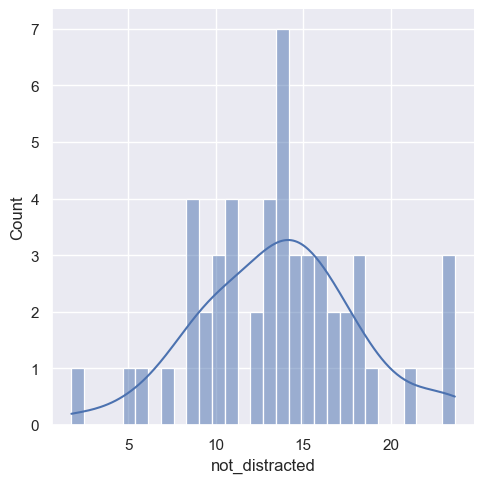

In [37]:
sns.displot(crash_df['not_distracted'], kde=True, bins=30)

## Joint plot
usefull to compare 2 distributions

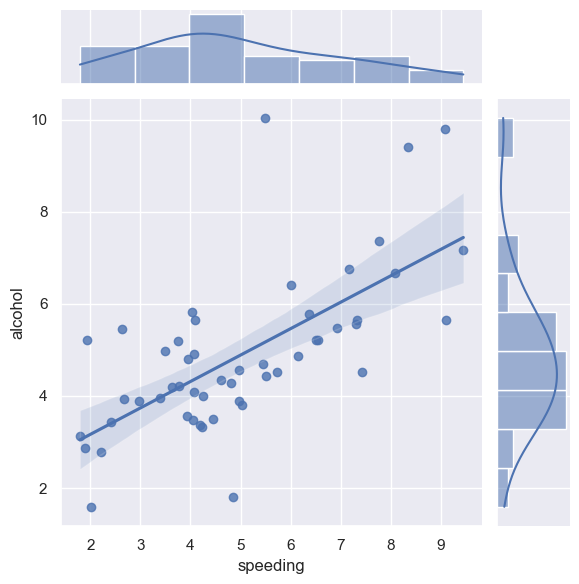

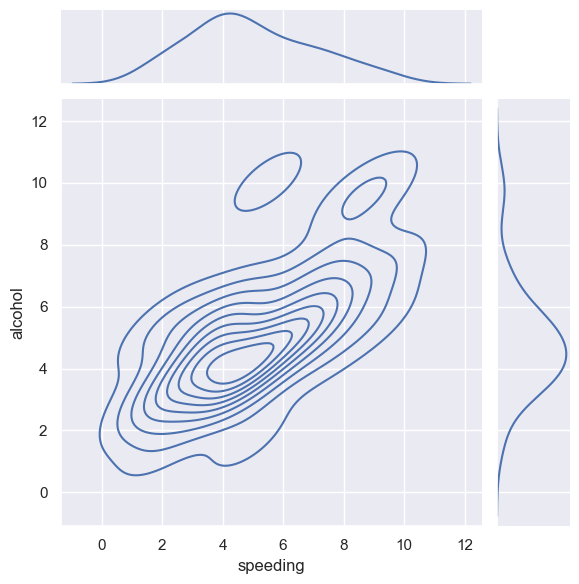

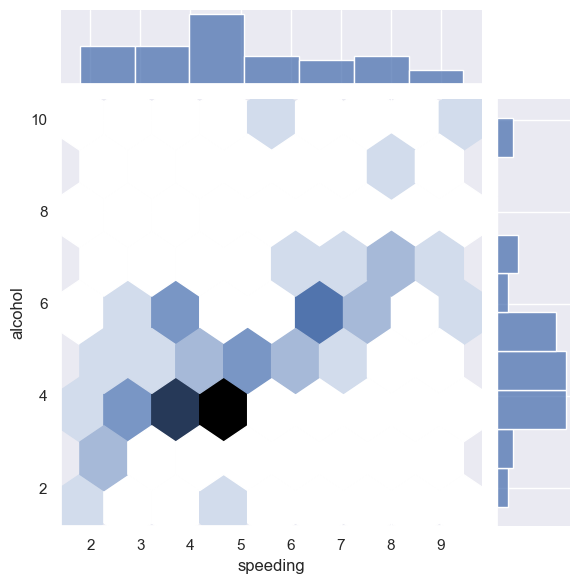

In [40]:
# create 2 displots with KDE combined in a 2D distribution
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind="reg") #kind will generate a regression line
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind="kde")
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind="hex")

## KDE plot

<Axes: xlabel='alcohol', ylabel='Density'>

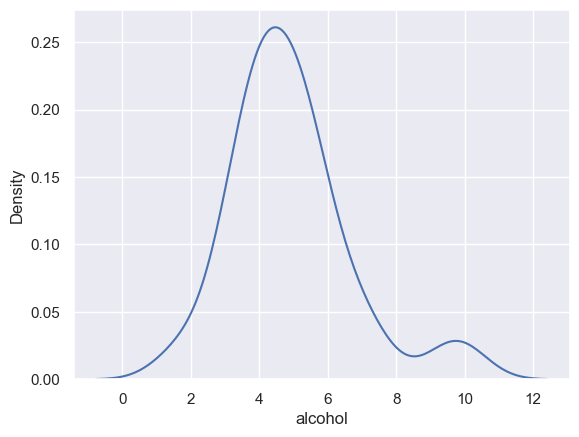

In [42]:
sns.kdeplot(crash_df['alcohol'])

## Pair plot
Will plot all correlation between each numerical paramaters 2 by 2 with scatter plot.

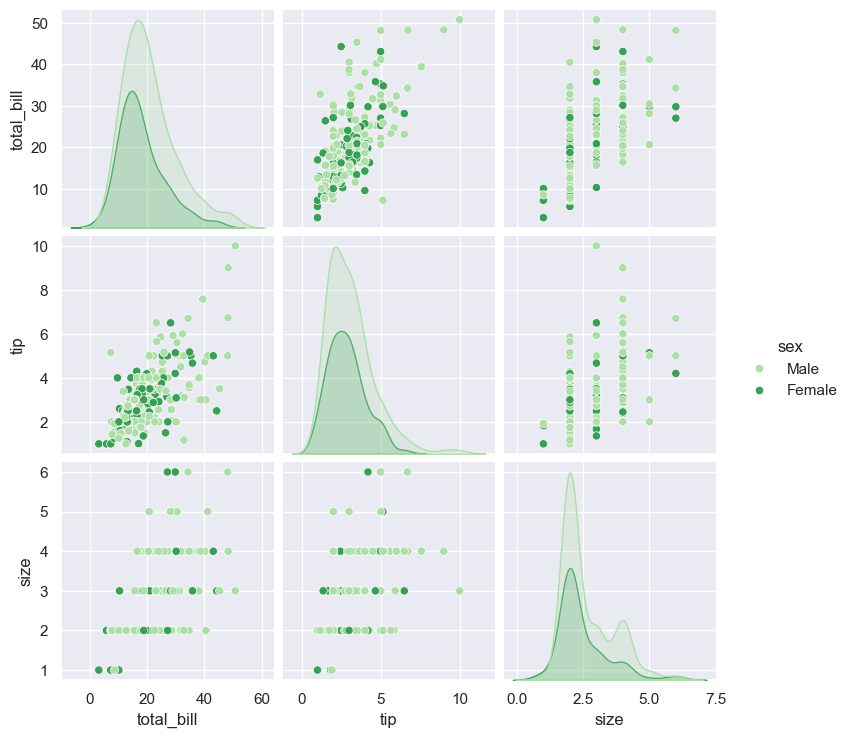

In [50]:
# sns.pairplot(crash_df)
# hue parameter will add another category to the visualization, changing the color of the spot of he values
# palette parameter change the coloration
sns.pairplot(tips_df, hue='sex', palette='Greens')  


## Rugplot
not used very much

<Axes: xlabel='tip'>

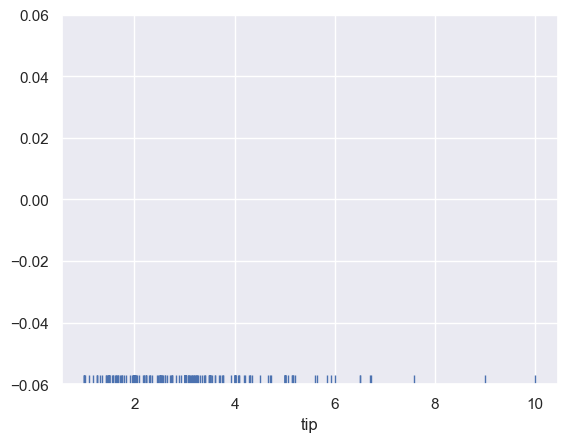

In [51]:
sns.rugplot(tips_df['tip'])

## Styling and labelling
set_style method can accept multiple parameters to personalize plot style

<Figure size 800x400 with 0 Axes>

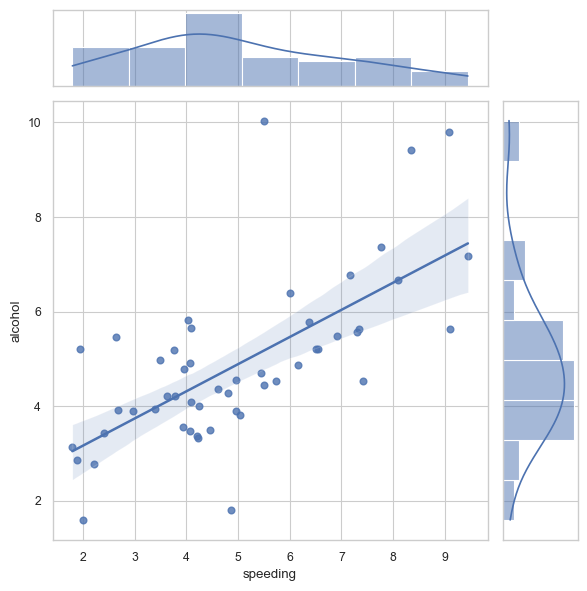

In [80]:
sns.set_style('whitegrid')

#Matplotlib can be uesd to edit seaborn's plots.
plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1) # Will parameter the size of the plot depending of a "context". 


sns.jointplot(x='speeding', y='alcohol', data=crash_df ,kind='reg')

sns.despine(top=False, right=False) # will delete the left axis. Set to False to make it appear again.

## Categorical plottings
Focus on distribution using categorical datas

### bar plots

<Axes: xlabel='sex', ylabel='total_bill'>

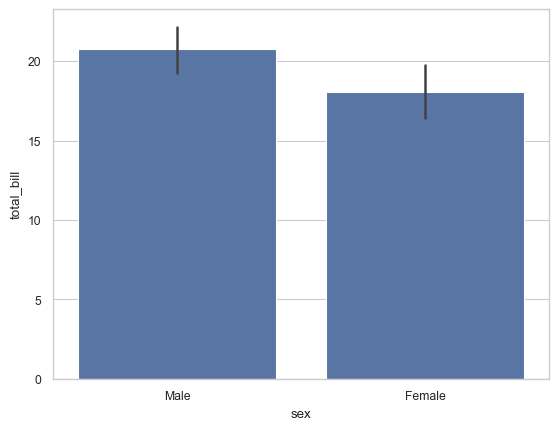

In [98]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.mean)  #estimator specify the aggregation of the datas (here, the mean)


### Count plot
count plot will generate histograms and give you the count of values

<Axes: xlabel='sex', ylabel='count'>

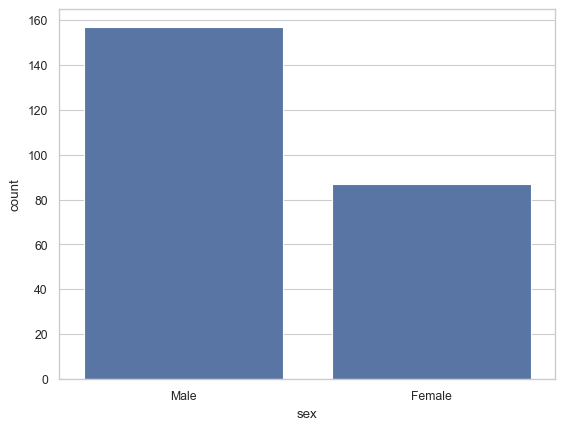

In [108]:
sns.countplot(x='sex', data=tips_df)


### Boxplot


<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400" height="200">

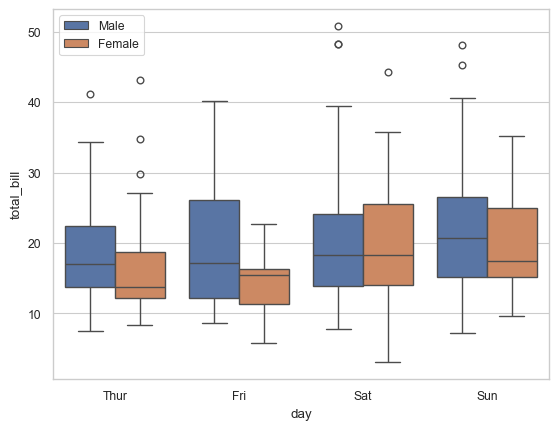

In [121]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

plt.legend(loc=0)  #can relocate the legend on the plot

### Violin plot
Similar to the box plot, but will use the KDE estimation to draw the plots.

<Axes: xlabel='day', ylabel='total_bill'>

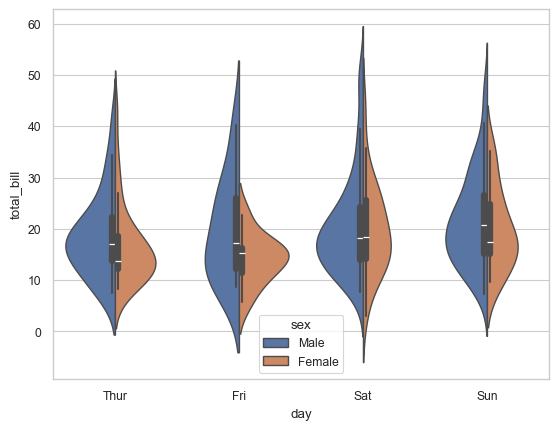

In [122]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

# Split is used to compare the density of the 2 categories defined by the hue parameter

### Strip plot

<Axes: xlabel='day', ylabel='total_bill'>

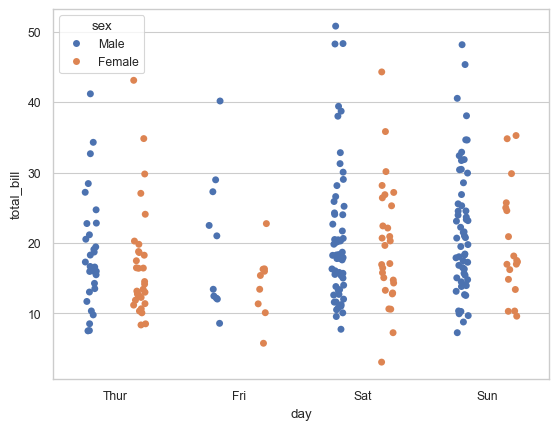

In [128]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True) 
# jitter help to separate the datapoints to close to each other
# dodge parameter will completly separate man and women datas points

### Swarm plot
Combine violing plot and strip plot

<Axes: xlabel='day', ylabel='total_bill'>

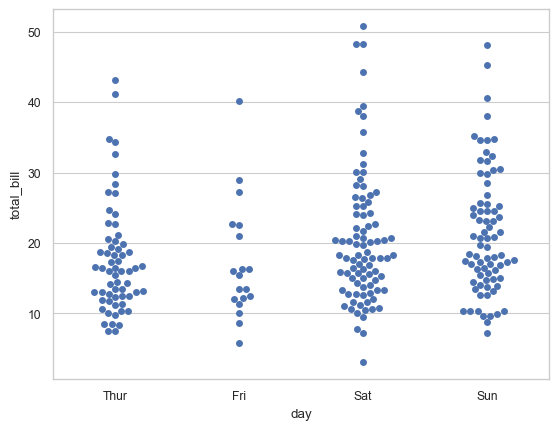

In [129]:
sns.swarmplot(x='day', y='total_bill', data=tips_df) 

### Palettes
Palette parameter is usefull to edit the color of the plot using matplotlib possibilities.

<Axes: xlabel='day', ylabel='total_bill'>

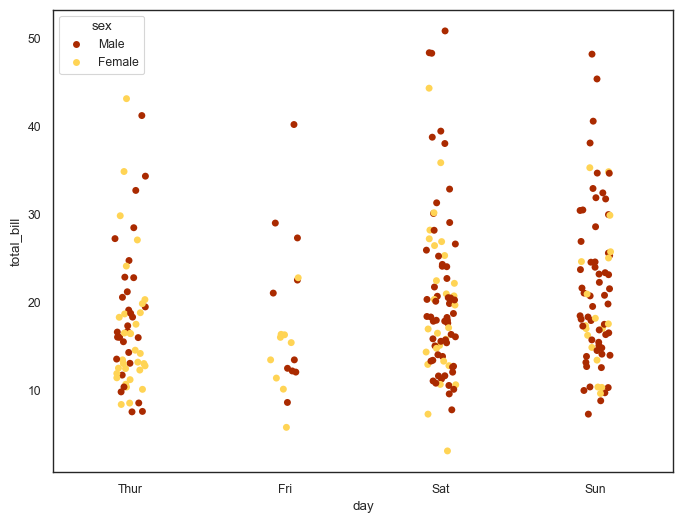

In [131]:
plt.figure(figsize=(8,6)) # Set figure size
sns.set_style('white')  # set general style
sns.set_context('paper') # set the context (define the global size of the plot and the legends)
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot') # palette parameter set the coloration of the data points.
plt.legend(loc=0) #set the position of the legend (upper right = 1, upper left = 2, bottom left = 3, bottom right = 4)

# Color setting availale on matplotlib api documentation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

## Matrix plots

### Heatmaps
Heatmap are usefull to obesrve correlation, and categories must be passed as a column, but also as rows in the visualization.
We have to create a matrix from the dataframe using the correlation method corr()

<Axes: >

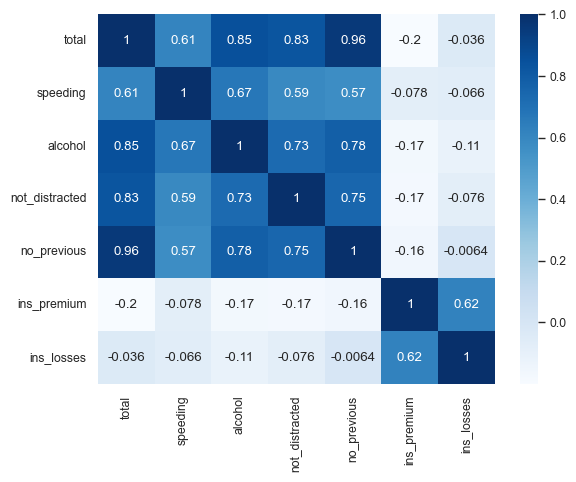

In [139]:
crash_mx = crash_df.select_dtypes('number').corr() # select all the numerical columns from the df to pass the correlation method and generate the correlation matrix
crash_mx

sns.heatmap(crash_mx, annot=True, cmap='Blues')

In [153]:
#pivot_table is also a viable transformation to generate a matrix.
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

C:\Users\GFEEU\AppData\Local\Temp\ipykernel_30168\3144585940.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights.pivot_table(index='month', columns='year', values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

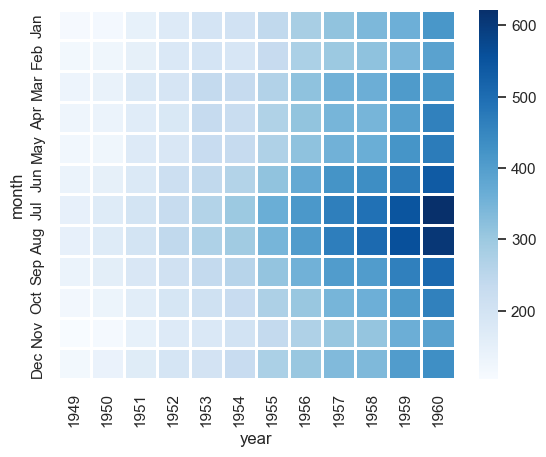

In [145]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1) #The blueish tiles are the one with the most passengers observable

### Cluster map
Generate hierarchicly clustered heatmap, and will try to generate clusters between the data points by swapping categories order

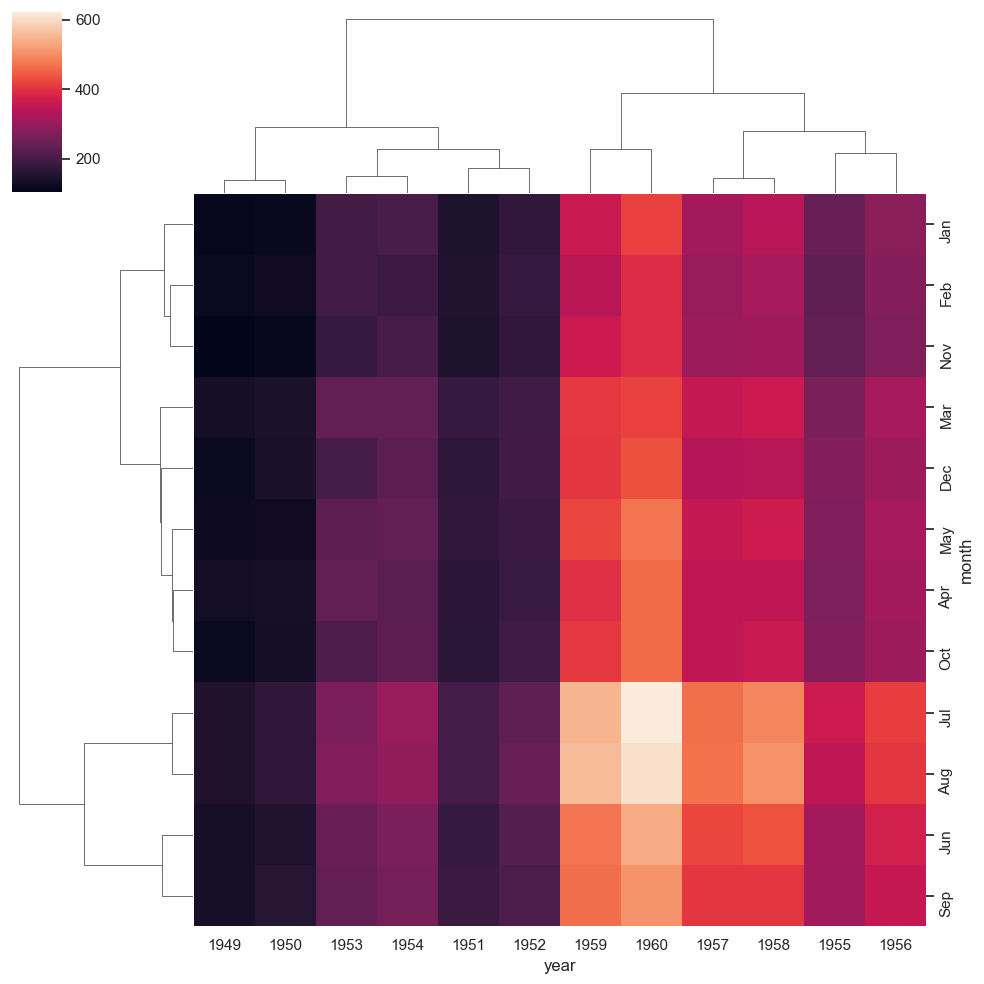

In [155]:
sns.clustermap(flights)


### Pair grid

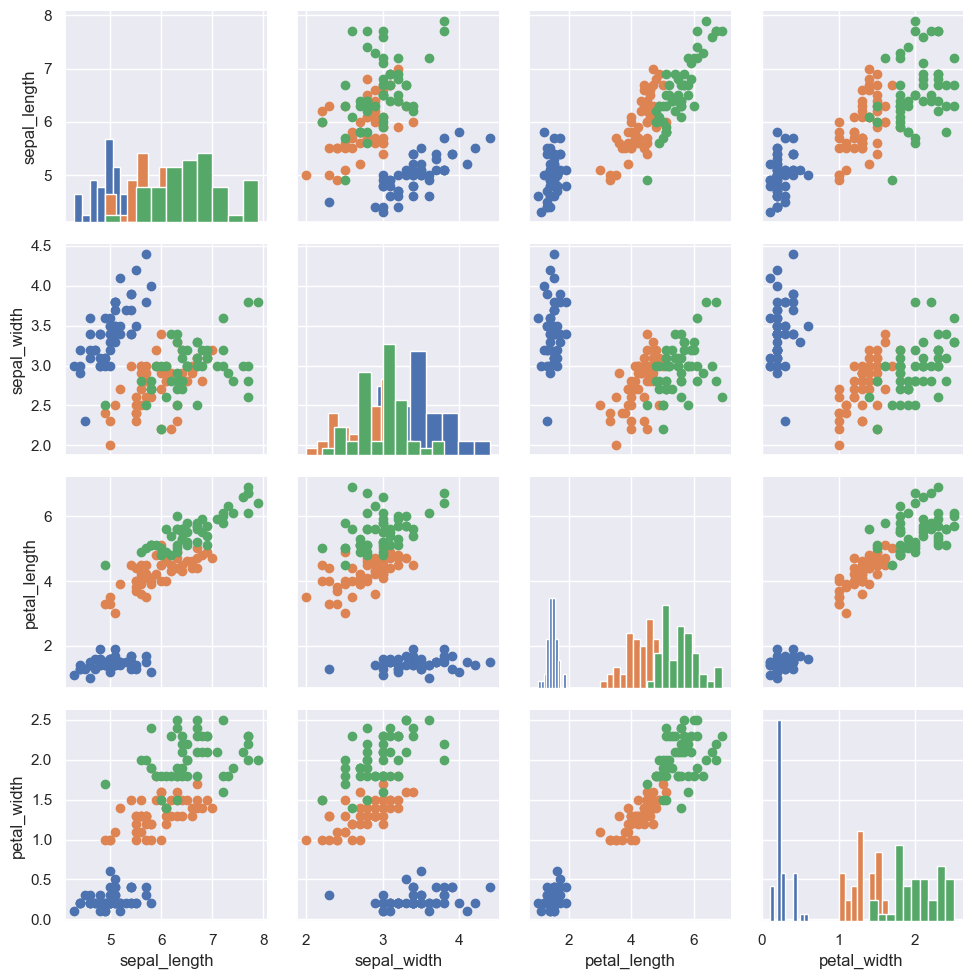

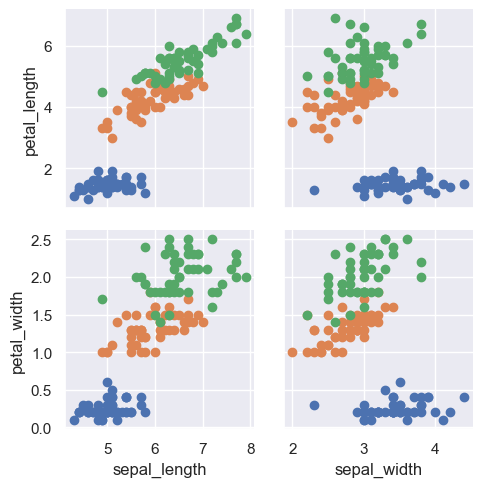

In [168]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')  #generate an empty grid
# iris_g.map(plt.scatter)   #define the plot to use to each tile of the grid

iris_g.map_diag(plt.hist)    # will generate ihstograms on diagonals
iris_g.map_offdiag(plt.scatter) # will generate scatter plots off the diagonal
# map_upper => will change the plots of the upper part of the diagonal
 # map_lower => will change the plots of the lower part of the diagonal
 
iris_g = sns.PairGrid(iris, hue='species',                             #will generate an empty pairgrid with specific categories
                     x_vars=['sepal_length', 'sepal_width'],
                     y_vars=['petal_length', 'petal_width'])

iris_g.map_offdiag(plt.scatter)

### Facet grid
Print multiple plot in a grid, defining the axis

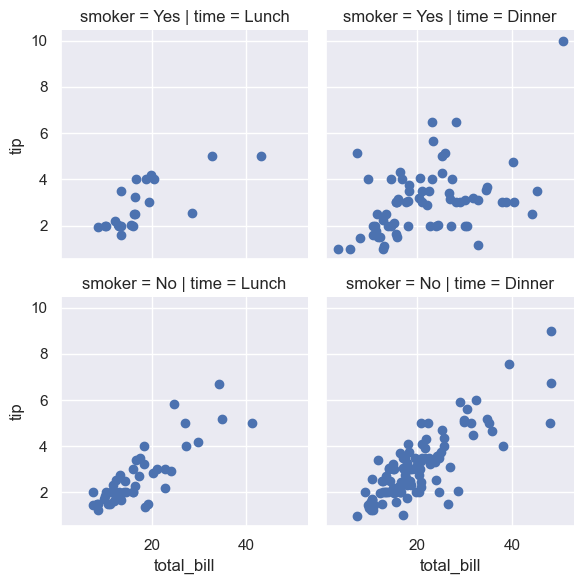

In [171]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')  # will create a grid containing 4 plots, depending of is smoker or not, and lunch time.
tips_fg.map(plt.scatter, 'total_bill', 'tip')


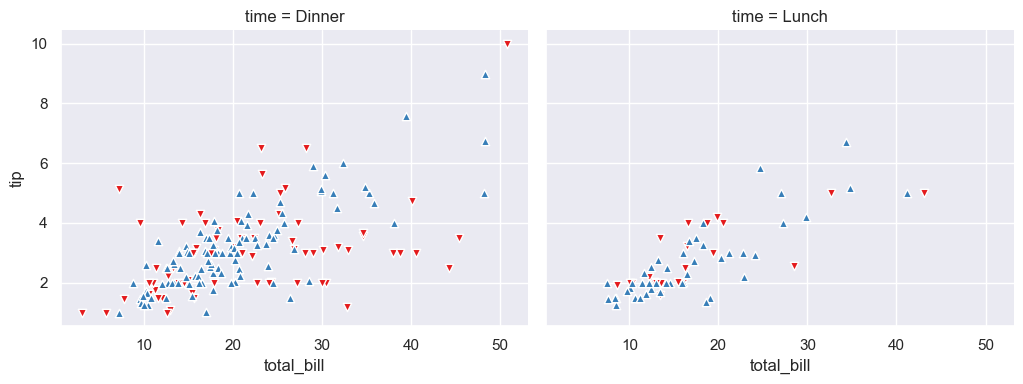

In [187]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                        col_order=['Dinner', 'Lunch'], palette='Set1', hue_kws={'marker' :['v', '^']})
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

### Regression plot
Permet d'effectuer une regression linéaire sur le scatter plot

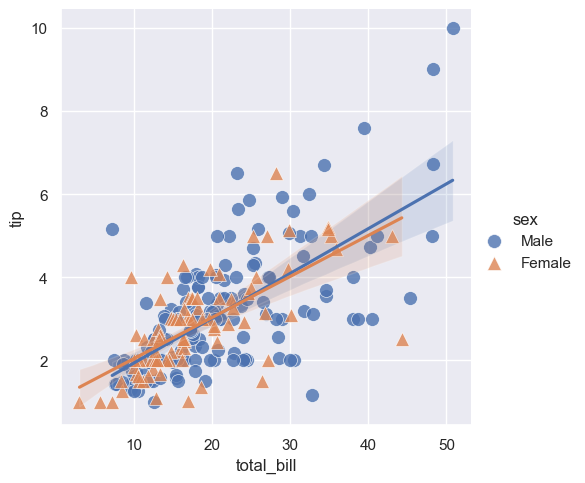

In [193]:
sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='sex', markers=['o', '^'],
           scatter_kws={'s':100, 'linewidths':0.5, 'edgecolor':'w'})

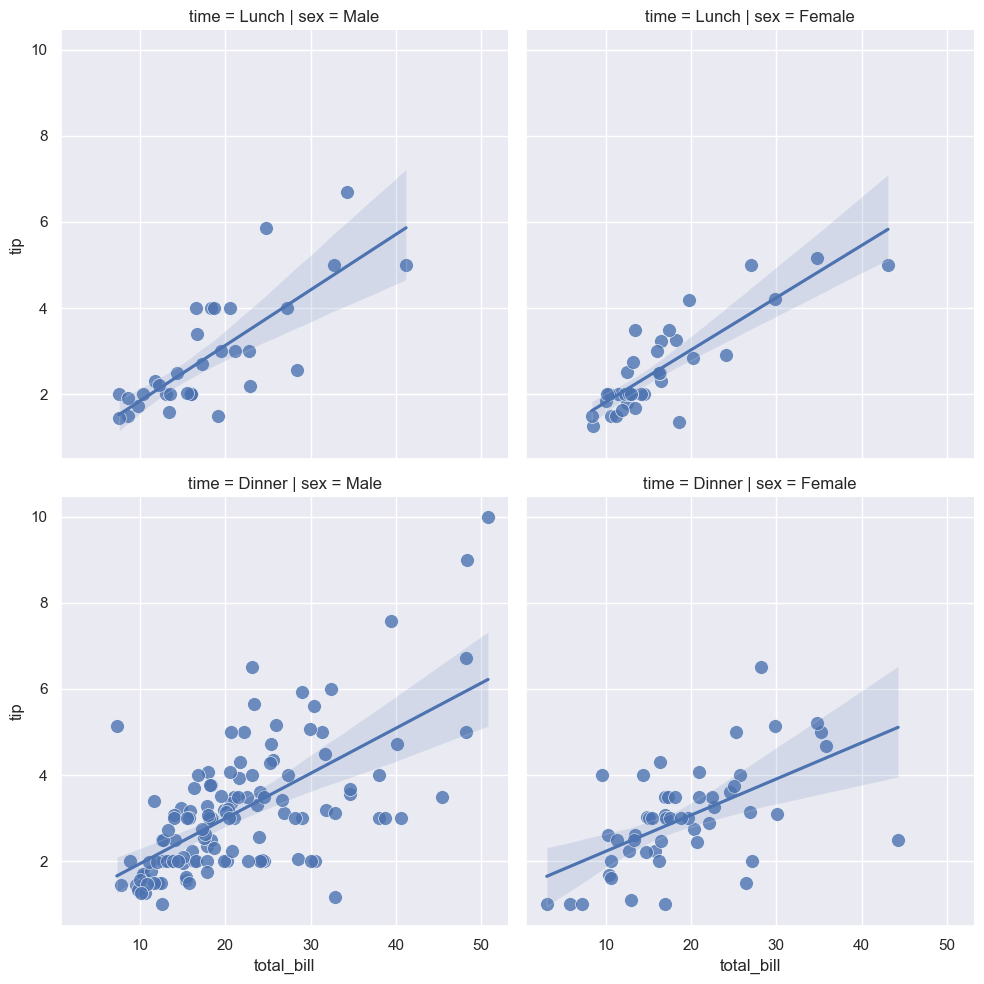

In [195]:
sns.lmplot(x='total_bill', y='tip', data=tips_df,
           scatter_kws={'s':100, 'linewidths':0.5, 'edgecolor':'w'}, col='sex', row='time')